<a href="https://colab.research.google.com/github/oliverZZ/193B_Glucose_Monitor/blob/master/Glucose_monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import pandas as pd
pd.options.display.max_rows = 20
import matplotlib.pyplot as plt
import numpy as np

# Modify the dataset slightly
pt118 = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose_Data.xlsx', '118', skiprows = 1) 
pt185 = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose_Data.xlsx', '185', skiprows = 1)
pt199 = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose_Data.xlsx', '199', skiprows = 1)
pt205 = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose_Data.xlsx', '205', skiprows = 1)
pt232 = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose_Data.xlsx', '232', skiprows = 1)
pt240 = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose_Data.xlsx', '240', skiprows = 1)

# BG_data = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose.xlsx')

In [0]:
def Data_preprocess(df):

  # drop Nan
  df = df.replace('None', np.NaN)
  df = df.dropna()
  df = df.reset_index(drop = True)

  # add glucose changes
  temp = []
  for i in range(0, len(df) - 1):
    temp.append(df.POC_Glucose[i + 1] - df.POC_Glucose[i])
  temp.append(np.NaN)
  df.insert(3, "d_Glucose", temp, False)

  df = df.dropna()
  df = df.reset_index(drop = True)

  return df

In [3]:
pt118 = Data_preprocess(pt118)
# pt185 = Data_preprocess(pt185)
# pt199 = Data_preprocess(pt199)
# pt205 = Data_preprocess(pt205)
# pt232 = Data_preprocess(pt232)
# pt240 = Data_preprocess(pt240)

pt118

,Time,POC_Glucose,Insulin_Rate,d_Glucose
0,0,507,7.0,-10.0
1,1,497,10.0,-26.0
2,2,471,15.0,-37.0
3,3,434,15.0,-50.0
4,4,384,15.0,-47.0
...,...,...,...,...
1942,2042,146,7.3,-1.0
1943,2043,145,7.3,-37.0
1944,2044,108,1.8,12.0
1945,2045,120,2.3,35.0


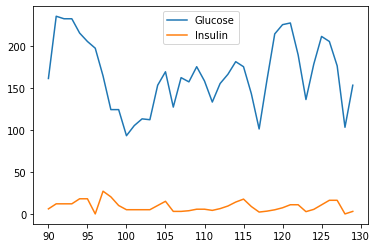

In [4]:
# plt.plot(pt118["Time"][90:130], pt205.POC_Glucose[90:130])
# plt.plot(pt118.POC_Glucose[0:1500], pt118.Insulin_Rate[0:1500], 'o')
plt.plot(pt118.POC_Glucose[90:130], label='Glucose')
plt.plot(pt118.Insulin_Rate[90:130], label='Insulin')
plt.legend()
plt.show()

### Linear Regression ###

In [0]:
len_data, num_cols = pt118.shape
train_set = pt118[0 : round(0.7 * len_data)]
test_set = pt118[round(0.7 * len_data) + 1 ::]

In [0]:
from sklearn.linear_model import LinearRegression
x = train_set.POC_Glucose.values.reshape(-1, 1)
y = train_set.Insulin_Rate
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.26505716528236545


In [0]:
test_set = test_set.reset_index(drop = True)
test_x = test_set.POC_Glucose.values.reshape(-1, 1)
test_y = test_set.Insulin_Rate

prediction = model.predict(test_x)

In [0]:
from sklearn import metrics

# print(metrics.mean_absolute_error(test_y, prediction))
# print(metrics.mean_squared_error(test_y, prediction))
print(np.sqrt(metrics.mean_squared_error(test_y, prediction)))

2.2729306511590357


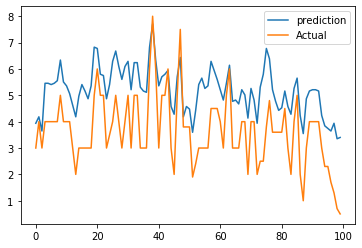

In [0]:
plt.plot(prediction[0:100], label='prediction')
plt.plot(test_set.Insulin_Rate[0:100], label='Actual')
plt.legend()
plt.show()

### Multiple Linear Regression ###

In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x = pt118[['POC_Glucose', 'Insulin_Rate']].values
y = pt118['d_Glucose'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

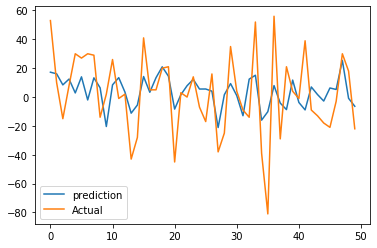

In [0]:
plt.plot(y_pred[150:200], label='prediction')
plt.plot(y_test[150:200], label='Actual')
plt.legend()
plt.show()

In [0]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

23.821780501366604


ValueError: ignored

### Polynomial Regression ###

In [0]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

x = pt118[['POC_Glucose', 'Insulin_Rate']].values
y = pt118['d_Glucose'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
                                                                                                        

poly = PolynomialFeatures(degree = 4) 
x_poly = poly.fit_transform(x_train) 
  
model = LinearRegression()
model.fit(x_poly, y_train)

y_pred = model.predict(poly.fit_transform(x_test))


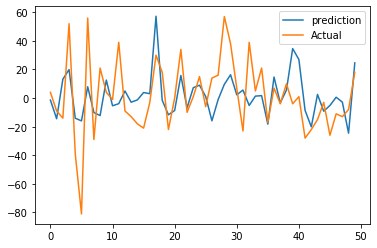

In [0]:
plt.plot(y_pred[180:230], label='prediction')
plt.plot(y_test[180:230], label='Actual')
plt.legend()
plt.show()

In [0]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r_sq = model.score(poly.fit_transform(x_test),y_test)
print('coefficient of determination:', r_sq)

23.72729484206011
coefficient of determination: 0.30590688473202854


### Classify Data ###

Classify the glucose changes and predict insulin by formula.

In [0]:
def feature_addition(df):

  bg_change = []
  Insulin_pred = [] 

  for i in range(0, len(df)):
    # Predict Insulin
    if (i == 0):
      Insulin_pred.append(df.Insulin_Rate[i])
    else:
      if (df.POC_Glucose[i] <= 110):
        if (df.d_Glucose[i - 1] <= -50):
          Insulin_pred.append(df.Insulin_Rate[i])
        elif (df.d_Glucose[i - 1] <= -31):
          Insulin_pred.append(df.Insulin_Rate[i - 1] * 0.25)
        elif (df.d_Glucose[i - 1] <= -11):
          Insulin_pred.append(df.Insulin_Rate[i - 1] * 0.5)
        elif (df.d_Glucose[i - 1] <= 10):
          Insulin_pred.append(df.Insulin_Rate[i - 1] * 0.75)
        elif (df.d_Glucose[i - 1] <= 30):
          Insulin_pred.append(df.Insulin_Rate[i - 1])
        else:
          Insulin_pred.append(min(df.Insulin_Rate[i - 1] * 1.5, df.Insulin_Rate[i - 1] + 10))
      
      elif (df.POC_Glucose[i] <= 150):
        if (df.d_Glucose[i - 1] <= -50):
          Insulin_pred.append(df.Insulin_Rate[i - 1] * 0.25)
        elif (df.d_Glucose[i - 1] <= -31):
          Insulin_pred.append(df.Insulin_Rate[i - 1] * 0.5)
        elif (df.d_Glucose[i - 1] <= -11):
          Insulin_pred.append(df.Insulin_Rate[i - 1] * 0.75)
        elif (df.d_Glucose[i - 1] <= 10):
          Insulin_pred.append(df.Insulin_Rate[i - 1])
        elif (df.d_Glucose[i - 1] <= 30):
          Insulin_pred.append(min(df.Insulin_Rate[i - 1] * 1.25, df.Insulin_Rate[i - 1] + 10))
        else:
          Insulin_pred.append(min(df.Insulin_Rate[i - 1] * 1.5, df.Insulin_Rate[i - 1] + 10))

      elif (df.POC_Glucose[i] <= 180):
        if (df.d_Glucose[i - 1] <= -50):
          Insulin_pred.append(df.Insulin_Rate[i - 1] * 0.5)
        elif (df.d_Glucose[i - 1] <= -31):
          Insulin_pred.append(df.Insulin_Rate[i - 1] * 0.75)
        elif (df.d_Glucose[i - 1] <= -11):
          Insulin_pred.append(df.Insulin_Rate[i - 1])
        elif (df.d_Glucose[i - 1] <= 10):
          Insulin_pred.append(min(df.Insulin_Rate[i - 1] * 1.25, df.Insulin_Rate[i - 1] + 10))
        elif (df.d_Glucose[i - 1] <= 30):
          Insulin_pred.append(min(df.Insulin_Rate[i - 1] * 1.5, df.Insulin_Rate[i - 1] + 10))
        else:
          Insulin_pred.append(min(df.Insulin_Rate[i - 1] * 2, df.Insulin_Rate[i - 1] + 10))

      elif (df.POC_Glucose[i] <= 210):
        if (df.d_Glucose[i - 1] <= -50):
          Insulin_pred.append(df.Insulin_Rate[i - 1] * 0.75)
        elif (df.d_Glucose[i - 1] <= -31):
          Insulin_pred.append(df.Insulin_Rate[i - 1])
        elif (df.d_Glucose[i - 1] <= -11):
          Insulin_pred.append(df.Insulin_Rate[i - 1])
        elif (df.d_Glucose[i - 1] <= 30):
          Insulin_pred.append(min(df.Insulin_Rate[i - 1] * 1.5, df.Insulin_Rate[i - 1] + 10))
        else:
          Insulin_pred.append(min(df.Insulin_Rate[i - 1] * 2, df.Insulin_Rate[i - 1] + 10))

      else:
        if (df.d_Glucose[i - 1] <= -31):
          Insulin_pred.append(df.Insulin_Rate[i - 1])
        elif (df.d_Glucose[i - 1] <= 10):
          Insulin_pred.append(min(df.Insulin_Rate[i - 1] * 1.5, df.Insulin_Rate[i - 1] + 10))
        else:
          Insulin_pred.append(min(df.Insulin_Rate[i - 1] * 2, df.Insulin_Rate[i - 1] + 10))

    # Label the glucose changes
    if (df.d_Glucose[i] <= -50):
      bg_change.append(0)
    elif (df.d_Glucose[i] <= -31):
      bg_change.append(1)
    elif (df.d_Glucose[i] <= -11):
      bg_change.append(2)
    elif (df.d_Glucose[i] <= 10):
      bg_change.append(3)
    elif (df.d_Glucose[i] <= 30):
      bg_change.append(4)
    else:
      bg_change.append(5)

  df.insert(3, "Insulin_formula", Insulin_pred, False)
  df.insert(5, "bg_change", bg_change, False)

  return df

def Insulin_prediction(df):
  Insulin_tot_pred = []

  for i in range(0, len(df)):
    if (i == 0):
        Insulin_tot_pred.append(df.Insulin_Rate[i])
    else:
      if (df.POC_Glucose[i] <= 110):
        if (df.d_Glucose[i - 1] <= -50):
          Insulin_tot_pred.append(df.Insulin_Rate[i])
        elif (df.d_Glucose[i - 1] <= -31):
          Insulin_tot_pred.append(Insulin_tot_pred[-1] * 0.25)
        elif (df.d_Glucose[i - 1] <= -11):
          Insulin_tot_pred.append(Insulin_tot_pred[-1] * 0.5)
        elif (df.d_Glucose[i - 1] <= 10):
          Insulin_tot_pred.append(Insulin_tot_pred[-1] * 0.75)
        elif (df.d_Glucose[i - 1] <= 30):
          Insulin_tot_pred.append(Insulin_tot_pred[-1])
        else:
          Insulin_tot_pred.append(min(Insulin_tot_pred[-1] * 1.5, Insulin_tot_pred[-1] + 10))
      
      elif (df.POC_Glucose[i] <= 150):
        if (df.d_Glucose[i - 1] <= -50):
          Insulin_tot_pred.append(Insulin_tot_pred[-1] * 0.25)
        elif (df.d_Glucose[i - 1] <= -31):
          Insulin_tot_pred.append(Insulin_tot_pred[-1] * 0.5)
        elif (df.d_Glucose[i - 1] <= -11):
          Insulin_tot_pred.append(Insulin_tot_pred[-1] * 0.75)
        elif (df.d_Glucose[i - 1] <= 10):
          Insulin_tot_pred.append(Insulin_tot_pred[-1])
        elif (df.d_Glucose[i - 1] <= 30):
          Insulin_tot_pred.append(min(Insulin_tot_pred[-1] * 1.25, Insulin_tot_pred[-1] + 10))
        else:
          Insulin_tot_pred.append(min(Insulin_tot_pred[-1] * 1.5, Insulin_tot_pred[-1] + 10))

      elif (df.POC_Glucose[i] <= 180):
        if (df.d_Glucose[i - 1] <= -50):
          Insulin_tot_pred.append(Insulin_tot_pred[-1] * 0.5)
        elif (df.d_Glucose[i - 1] <= -31):
          Insulin_tot_pred.append(Insulin_tot_pred[-1] * 0.75)
        elif (df.d_Glucose[i - 1] <= -11):
          Insulin_tot_pred.append(Insulin_tot_pred[-1])
        elif (df.d_Glucose[i - 1] <= 10):
          Insulin_tot_pred.append(min(Insulin_tot_pred[-1] * 1.25, Insulin_tot_pred[-1] + 10))
        elif (df.d_Glucose[i - 1] <= 30):
          Insulin_tot_pred.append(min(Insulin_tot_pred[-1] * 1.5, Insulin_tot_pred[-1] + 10))
        else:
          Insulin_tot_pred.append(min(Insulin_tot_pred[-1] * 2, Insulin_tot_pred[-1] + 10))

      elif (df.POC_Glucose[i] <= 210):
        if (df.d_Glucose[i - 1] <= -50):
          Insulin_tot_pred.append(Insulin_tot_pred[-1] * 0.75)
        elif (df.d_Glucose[i - 1] <= -31):
          Insulin_tot_pred.append(Insulin_tot_pred[-1])
        elif (df.d_Glucose[i - 1] <= -11):
          Insulin_tot_pred.append(Insulin_tot_pred[-1])
        elif (df.d_Glucose[i - 1] <= 30):
          Insulin_tot_pred.append(min(Insulin_tot_pred[-1] * 1.5, Insulin_tot_pred[-1] + 10))
        else:
          Insulin_tot_pred.append(min(Insulin_tot_pred[-1] * 2, Insulin_tot_pred[-1] + 10))

      else:
        if (df.d_Glucose[i - 1] <= -31):
          Insulin_tot_pred.append(Insulin_tot_pred[-1])
        elif (df.d_Glucose[i - 1] <= 10):
          Insulin_tot_pred.append(min(Insulin_tot_pred[-1] * 1.5, Insulin_tot_pred[-1] + 10))
        else:
          Insulin_tot_pred.append(min(Insulin_tot_pred[-1] * 2, Insulin_tot_pred[-1] + 10))

  df.insert(4, "Insulin_tot_formula", Insulin_tot_pred, False)

  return df

In [0]:
pt118 = feature_addition(pt118)

In [0]:
pt118 = Insulin_prediction(pt118)

## Regression ##

In [0]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics

x = pt118[['POC_Glucose', 'Insulin_Rate', 'Insulin_formula', 'Insulin_tot_formula']].values
y = pt118['bg_change'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
                                                                                                        

poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x_train) 
  
model = LinearRegression()
model.fit(x_poly, y_train)

y_pred = model.predict(poly.fit_transform(x_test))

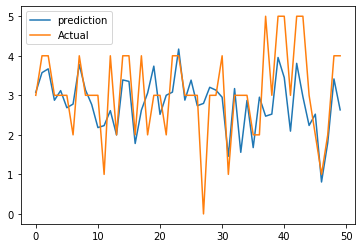

In [13]:
plt.plot(y_pred[250:300], label='prediction')
plt.plot(y_test[250:300], label='Actual')
plt.legend()
plt.show()

In [12]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r_sq = model.score(poly.fit_transform(x_test),y_test)
print('coefficient of determination:', r_sq)

1.0436000455110264
coefficient of determination: 0.321475446210011


## Classification ##

In [41]:
pip install -U imbalanced-learn

     |████████████████████████████████| 163kB 4.9MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import imblearn

x = pt118[['POC_Glucose', 'Insulin_Rate', 'Insulin_formula', 'Insulin_tot_formula']].values
y = pt118['bg_change'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

balance = imblearn.over_sampling.SMOTE()
train_x, train_y = balance.fit_resample(x_train, y_train)
train_y = pd.Series(train_y)

model = RandomForestClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

y_pred = model.predict(x_test)

In [14]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.25      0.28      0.26        18
           1       0.30      0.21      0.24        29
           2       0.17      0.19      0.18        69
           3       0.43      0.50      0.46       145
           4       0.30      0.27      0.28        79
           5       0.21      0.14      0.17        50

    accuracy                           0.32       390
   macro avg       0.28      0.26      0.27       390
weighted avg       0.31      0.32      0.31       390



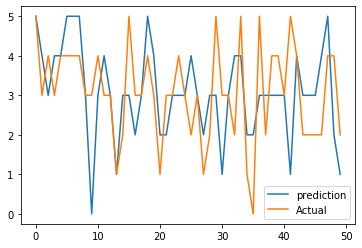

In [17]:
plt.plot(y_pred[150:200], label='prediction')
plt.plot(y_test[150:200], label='Actual')
plt.legend()
plt.show()